In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# <i> Classification <i>
To start with classification example I will be using the toy datasets available in scikit learn library

For this purpose I will use digits data set (from sklearn.datasets).  

In [5]:
#loading digits datasets
from sklearn.datasets import load_digits
digits = load_digits()

In [6]:
#digits is a dictionary contains the following keys
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [10]:
#there are 1797 digits (gray scale images each of size 8X8 matrix)
digits.images.shape

(1797, 8, 8)

In [12]:
#sample image
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

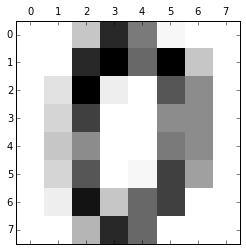

In [15]:
#below is the image of 0 in grey scale
plt.matshow(digits.images[0], cmap = plt.cm.Greys)

In [16]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
#there are 1797 target data
digits.target.shape

(1797,)

In [18]:
#split the data for training and testing using sklearn cross validation module
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target) 
#default is 75:25 ratio and can be customised using the options train_size test_size

In [19]:
X_train.shape

(1347, 64)

In [20]:
# I will use Support vector classification to start with 
'''
    Below are the steps for fitting almost any model with sklearn
    Import the model -> instantiate -> fit -> predict -> score (supervised learning you should score your model on 
    unseen data to understand the performance of your model)
 '''
from sklearn.svm import LinearSVC

In [22]:
#LinearSVC takes bunch of parameters and C which is a penality of regularization parameter
svm = LinearSVC(C= 0.1) # in real time modelling scenarios use list of values of regularization and evaluate the model
                        # on unseen data for each iteration and pick the best one

Fit/train the model

In [24]:
model_svm = svm.fit(X_train, y_train)

In [25]:
#Predict on unseen test data
results = model_svm.predict(X_test)

In [27]:
#score the model
model_svm.score(X_test, y_test)

0.96666666666666667

In [28]:
model_svm.score(X_train, y_train)

0.99628804751299183

Accuracy on the train set is ~96.7% and test set is 99.6%

I will fit the Random forest classification

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model_rf = RandomForestClassifier(n_estimators= 50, random_state= 10) # n_estimator represents number of trees and 
                                                                      #random_state is like a seed for reproducability
''' Many more parameters can be set like bootsrap etc as shown below'''    

' Many more parameters can be set like bootsrap etc as shown below'

In [33]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [34]:
model_rf.predict(X_test)

array([8, 9, 8, 5, 4, 3, 8, 1, 4, 3, 8, 8, 5, 0, 7, 6, 1, 2, 3, 8, 5, 0, 2,
       1, 4, 9, 4, 2, 4, 3, 8, 3, 2, 3, 9, 5, 4, 7, 3, 1, 7, 7, 2, 4, 2, 9,
       2, 2, 7, 5, 0, 4, 9, 1, 8, 6, 2, 4, 3, 0, 5, 9, 7, 7, 9, 9, 6, 2, 5,
       6, 8, 9, 2, 5, 1, 2, 8, 4, 1, 6, 6, 7, 0, 5, 0, 1, 9, 7, 2, 9, 1, 5,
       4, 0, 4, 0, 6, 5, 2, 3, 6, 6, 6, 1, 6, 9, 5, 3, 7, 3, 2, 0, 8, 1, 2,
       2, 4, 5, 8, 4, 4, 2, 6, 3, 0, 5, 3, 0, 1, 5, 7, 1, 6, 8, 2, 6, 1, 0,
       4, 0, 2, 5, 1, 5, 2, 0, 5, 0, 0, 4, 0, 5, 6, 3, 5, 8, 2, 9, 4, 7, 7,
       2, 9, 0, 7, 7, 5, 6, 2, 0, 5, 2, 5, 3, 9, 9, 7, 1, 9, 4, 4, 9, 5, 2,
       7, 2, 7, 3, 7, 9, 5, 3, 7, 5, 5, 4, 9, 9, 9, 9, 5, 9, 4, 7, 4, 5, 5,
       2, 0, 6, 1, 1, 0, 6, 6, 1, 9, 5, 6, 9, 9, 2, 4, 1, 0, 8, 5, 9, 3, 6,
       1, 3, 2, 2, 4, 3, 3, 2, 6, 5, 9, 2, 5, 6, 5, 8, 0, 9, 5, 2, 8, 3, 9,
       1, 3, 6, 3, 2, 8, 4, 4, 9, 3, 7, 6, 5, 6, 2, 3, 1, 1, 3, 5, 3, 8, 9,
       3, 8, 9, 4, 2, 9, 6, 5, 8, 6, 6, 3, 6, 2, 4, 3, 1, 6, 5, 0, 7, 5, 1,
       8, 5,

In [35]:
model_rf.score(X_test,y_test)

0.97333333333333338